<a href="https://colab.research.google.com/github/OELSHARK/Linear-Multiple-and-Polynomial./blob/main/Linear%26PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('WHO COVID-19 cases.csv')

In [ ]:
df.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58560 entries, 0 to 58559
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      58560 non-null  object 
 1   Country_code       58316 non-null  object 
 2   Country            58560 non-null  object 
 3   Continent          58560 non-null  object 
 4   WHO_region         54168 non-null  object 
 5   New_cases          39260 non-null  float64
 6   Cumulative_cases   58560 non-null  int64  
 7   New_deaths         25084 non-null  float64
 8   Cumulative_deaths  58560 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 4.0+ MB


In [ ]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.926000e+04,5.856000e+04,25084.000000,5.856000e+04
mean,1.976918e+04,1.810312e+06,281.507335,2.012550e+04
std,2.699850e+05,7.851277e+06,1212.511007,8.220948e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,4.200000e+01,4.402750e+03,4.000000,2.900000e+01
50%,3.900000e+02,4.682750e+04,20.000000,5.845000e+02
75%,3.925000e+03,5.351678e+05,104.000000,7.118000e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.197213e+06


In [ ]:
dtypes = df.dtypes
nunique = df.nunique()
null = df.isnull().sum()
dtypes_nunique_null = pd.DataFrame({"dtypes":dtypes,"nunique":nunique,"null":null})
dtypes_nunique_null

,dtypes,nunique,null
Date_reported,object,244,0
Country_code,object,239,244
Country,object,240,0
Continent,object,8,0
WHO_region,object,7,4392
New_cases,float64,11970,19300
Cumulative_cases,int64,34234,0
New_deaths,float64,2138,33476
Cumulative_deaths,int64,14289,0


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region'], dtype='object')

In [ ]:
df[categorical_columns] = df[categorical_columns].astype('category')


In [ ]:
print(df.dtypes)

Date_reported        category
Country_code         category
Country              category
Continent            category
WHO_region           category
New_cases             float64
Cumulative_cases        int64
New_deaths            float64
Cumulative_deaths       int64
dtype: object


In [ ]:
numeric_columns = df.select_dtypes(include=['int64','float64']).columns
numeric_columns

Index(['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], dtype='object')

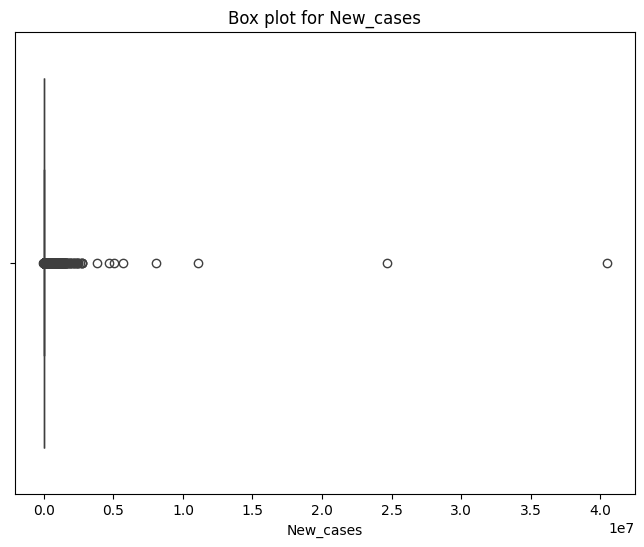

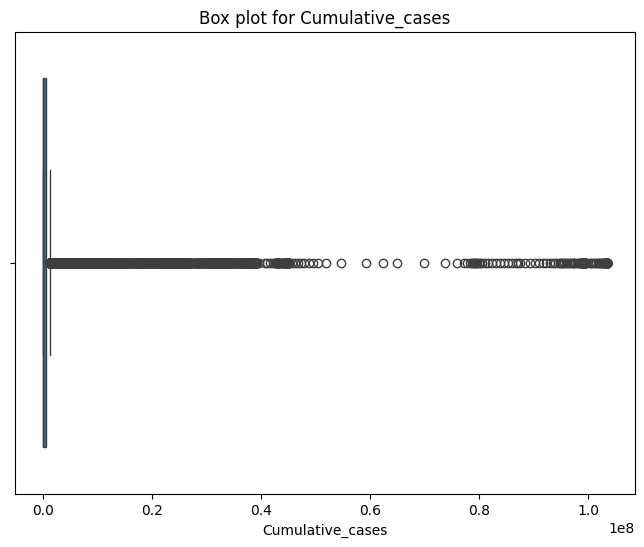

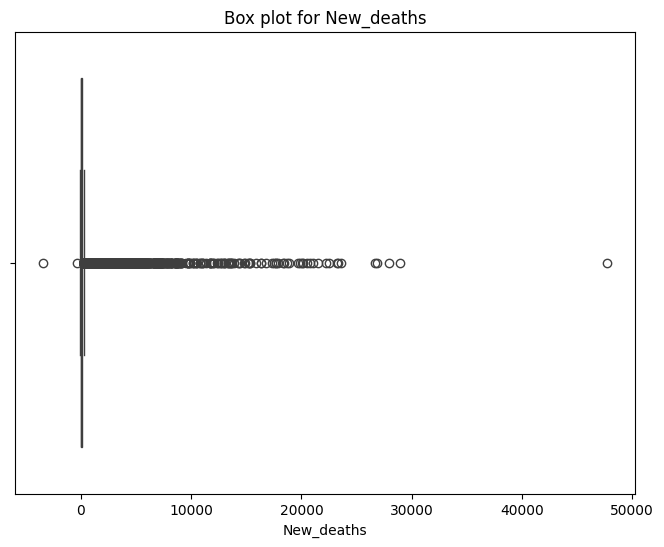

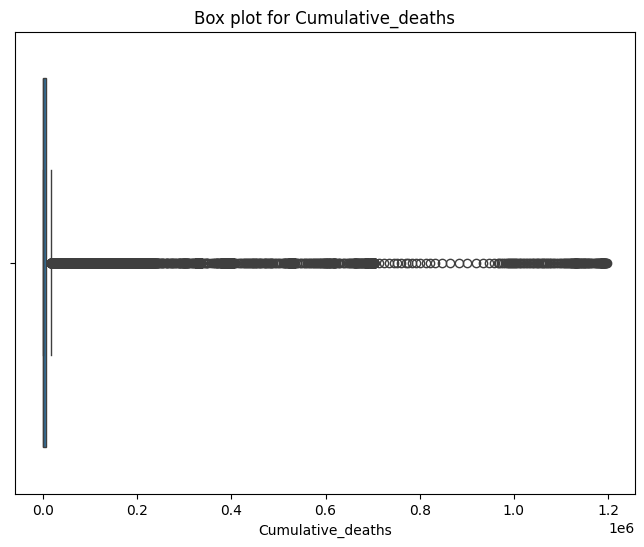

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


for column in numeric_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[column])
  plt.title(f"Box plot for {column}")
  plt.show()


In [ ]:
numeric_columns

Index(['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], dtype='object')

In [ ]:
q1 = df['New_cases'].quantile(0.25)
q3 = df['New_cases'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['New_cases'] >= lower_bound) & (df['New_cases'] <= upper_bound)]

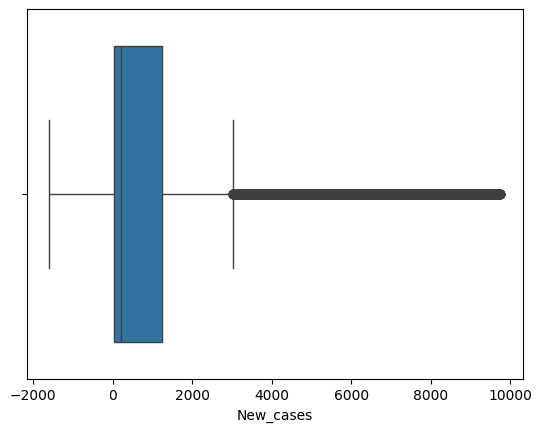

In [ ]:
sns.boxplot(x=df['New_cases'])
plt.show()

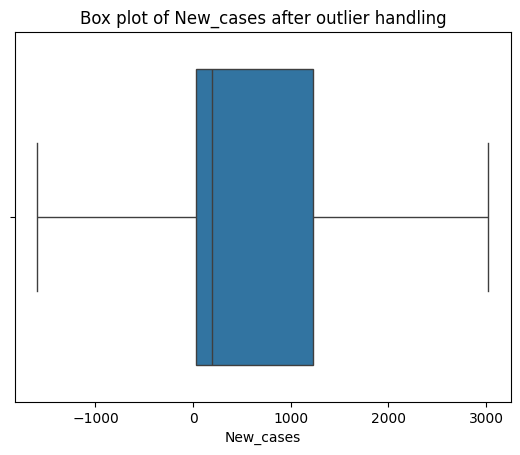

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Q1 = df['New_cases'].quantile(0.25)
Q3 = df['New_cases'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['New_cases'] < lower_bound) | (df['New_cases'] > upper_bound)]


df['New_cases'] = np.where(df['New_cases'] > upper_bound, upper_bound, df['New_cases'])


sns.boxplot(x=df['New_cases'])
plt.title('Box plot of New_cases after outlier handling')
plt.show()


In [ ]:
numeric_columns

Index(['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'], dtype='object')

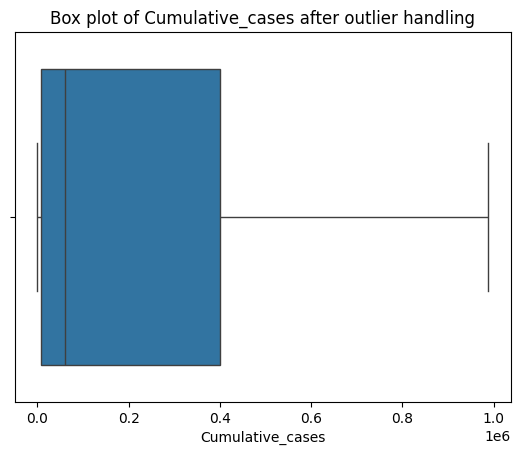

In [ ]:

Q1 = df['Cumulative_cases'].quantile(0.25)
Q3 = df['Cumulative_cases'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Cumulative_cases'] < lower_bound) | (df['Cumulative_cases'] > upper_bound)]


df['Cumulative_cases'] = np.where(df['Cumulative_cases'] > upper_bound, upper_bound, df['Cumulative_cases'])


sns.boxplot(x=df['Cumulative_cases'])
plt.title('Box plot of Cumulative_cases after outlier handling')
plt.show()


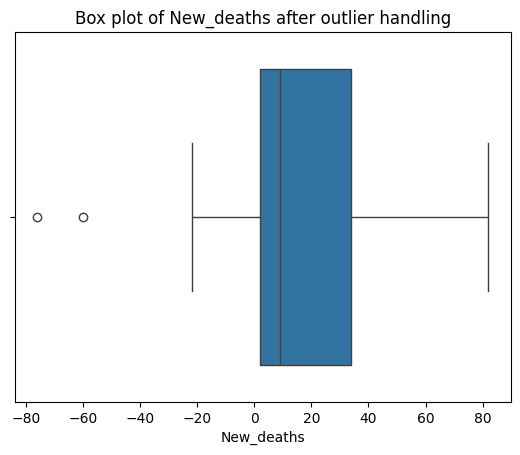

In [ ]:

Q1 = df['New_deaths'].quantile(0.25)
Q3 = df['New_deaths'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['New_deaths'] < lower_bound) | (df['New_deaths'] > upper_bound)]


df['New_deaths'] = np.where(df['New_deaths'] > upper_bound, upper_bound, df['New_deaths'])


sns.boxplot(x=df['New_deaths'])
plt.title('Box plot of New_deaths after outlier handling')
plt.show()


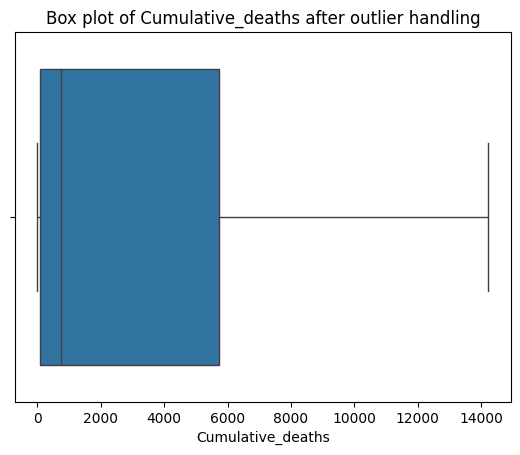

In [ ]:

Q1 = df['Cumulative_deaths'].quantile(0.25)
Q3 = df['Cumulative_deaths'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Cumulative_deaths'] < lower_bound) | (df['Cumulative_deaths'] > upper_bound)]


df['Cumulative_deaths'] = np.where(df['Cumulative_deaths'] > upper_bound, upper_bound, df['Cumulative_deaths'])


sns.boxplot(x=df['Cumulative_deaths'])
plt.title('Box plot of Cumulative_deaths after outlier handling')
plt.show()


In [ ]:
dtypes = df.dtypes
nunique = df.nunique()
null = df.isnull().sum()
dtypes_nunique_null = pd.DataFrame({"dtypes":dtypes,"nunique":nunique,"null":null})
dtypes_nunique_null

,dtypes,nunique,null
Date_reported,category,244,0
Country_code,category,237,197
Country,category,238,0
Continent,category,8,0
WHO_region,category,7,1990
New_cases,float64,2770,0
Cumulative_cases,float64,22483,0
New_deaths,float64,88,14329
Cumulative_deaths,float64,5833,0


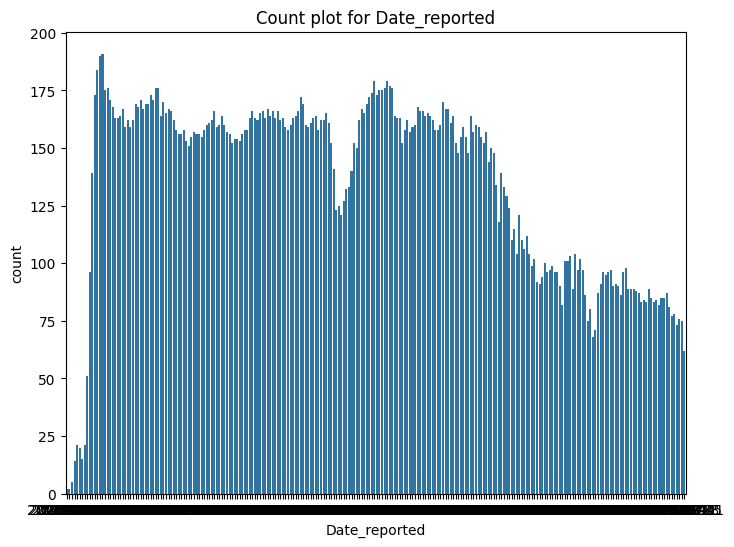

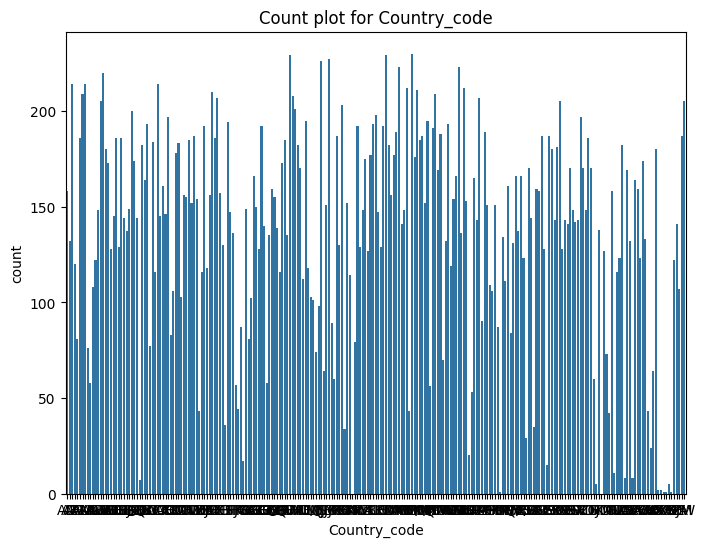

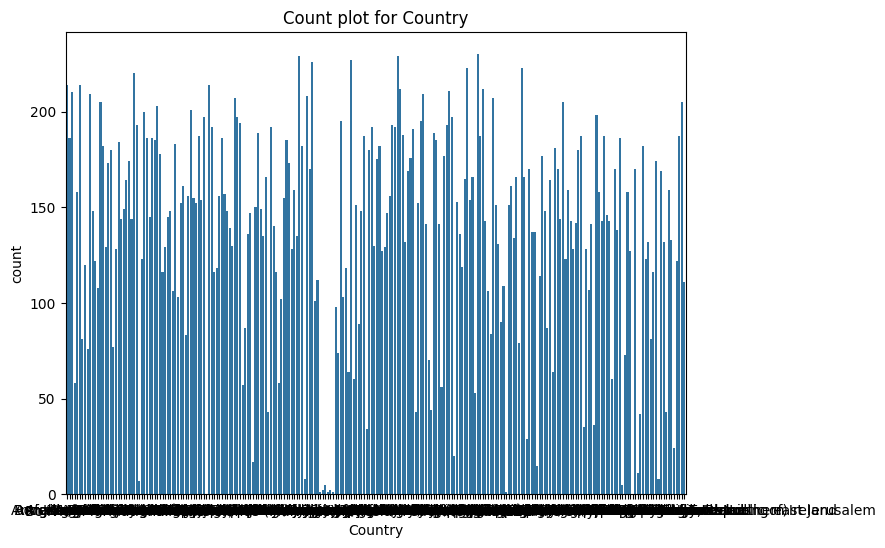

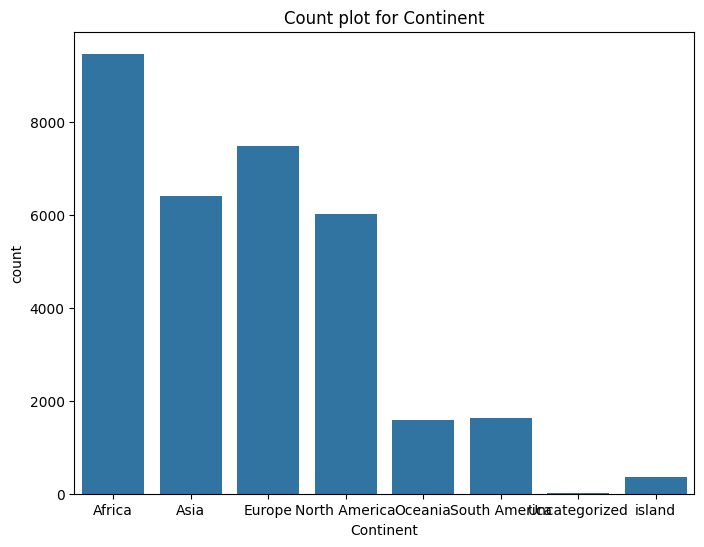

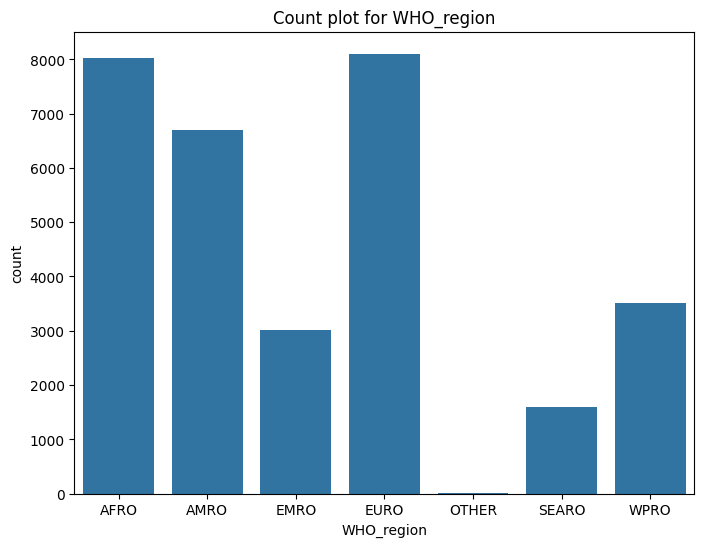

In [ ]:
for col in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[col])
  plt.title(f"Count plot for {col}")
  plt.show()

In [ ]:
df.duplicated().sum()

0

In [ ]:

null_percentage = (df.isnull().sum() / len(df)) * 100
print(null_percentage)


Date_reported         0.000000
Country_code          0.597876
Country               0.000000
Continent             0.000000
WHO_region            6.039454
New_cases             0.000000
Cumulative_cases      0.000000
New_deaths           43.487102
Cumulative_deaths     0.000000
dtype: float64


In [ ]:
df.drop('New_deaths', axis=1, inplace=True)

In [ ]:
categorical_columns

Index(['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region'], dtype='object')

In [ ]:
df['Date_reported'].unique()

['2020-03-01', '2020-03-15', '2020-03-22', '2020-03-29', '2020-04-05', ..., '2020-02-23', '2020-01-05', '2020-01-12', '2020-01-19', '2020-02-16']
Length: 244
Categories (244, object): ['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26', ..., '2024-08-11',
                           '2024-08-18', '2024-08-25', '2024-09-01']

In [ ]:

df['Date_reported'] = pd.to_datetime(df['Date_reported'])


In [ ]:
df['Date_reported']

,Date_reported
8,2020-03-01
10,2020-03-15
11,2020-03-22
12,2020-03-29
13,2020-04-05
...,...
58550,2024-06-30
58551,2024-07-07
58552,2024-07-14
58554,2024-07-28


In [ ]:
df['Country_code'].unique()

['AF', 'AL', 'DZ', 'AS', 'AD', ..., 'VN', 'WF', 'YE', 'ZM', 'ZW']
Length: 238
Categories (239, object): ['AD', 'AE', 'AF', 'AG', ..., 'YT', 'ZA', 'ZM', 'ZW']

In [ ]:
!pip install category_encoders
import category_encoders as ce

binary_encode_cols = ['Date_reported', 'Country_code', 'Country', 'Continent', 'WHO_region']
# Use ce.BinaryEncoder to access the class from the imported library
be = ce.BinaryEncoder(cols=binary_encode_cols)
df = be.fit_transform(df)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 2.5 MB/s eta 0:00:00


In [ ]:
df.isnull().sum()

,0
Date_reported_0,0
Date_reported_1,0
Date_reported_2,0
Date_reported_3,0
Date_reported_4,0
Date_reported_5,0
Date_reported_6,0
Date_reported_7,0
Country_code_0,0
Country_code_1,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df

,Date_reported_0,Date_reported_1,Date_reported_2,Date_reported_3,Date_reported_4,Date_reported_5,Date_reported_6,Date_reported_7,Country_code_0,Country_code_1,...,Continent_1,Continent_2,Continent_3,WHO_region_0,WHO_region_1,WHO_region_2,WHO_region_3,New_cases,Cumulative_cases,Cumulative_deaths
8,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,1.0,1.0,0.0
10,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,6.0,7.0,0.0
11,0,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,1,17.0,24.0,0.0
12,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,67.0,91.0,2.0
13,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,183.0,274.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58550,1,1,1,0,0,0,1,0,1,1,...,0,1,1,0,0,1,1,4.0,266378.0,5740.0
58551,1,1,1,0,0,0,1,1,1,1,...,0,1,1,0,0,1,1,6.0,266384.0,5740.0
58552,1,1,1,0,0,1,0,0,1,1,...,0,1,1,0,0,1,1,1.0,266385.0,5740.0
58554,1,1,1,0,0,1,1,0,1,1,...,0,1,1,0,0,1,1,1.0,266386.0,5740.0


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop('Cumulative_deaths', axis=1)
y = df['Cumulative_deaths']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

ImportError: cannot import name 'LinearRegression' from 'sklearn.preprocessing' (/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/__init__.py)

In [ ]:
# Instead of importing from sklearn.preprocessing, import from sklearn.linear_model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 5396387.524592164
Mean Absolute Error: 1392.1865776412924


In [ ]:
lr.score(X_test, y_test)

0.7986802548380869

In [ ]:
lr.coef_

array([-1.80494559e+02,  1.35660965e+02, -1.00132384e+02,  3.62192945e+01,
       -8.37806527e+00, -1.38672732e+01,  3.15614186e+00,  4.01632788e+00,
       -8.15469308e+01,  3.83375637e+02,  1.77369327e+02,  6.74711323e+02,
        1.03709828e+02, -1.05277878e+02,  2.30755141e+02, -1.04394391e+02,
       -8.15469308e+01, -5.24430666e+02, -5.72898655e+02, -4.46531316e+02,
        1.77358861e+02,  2.22616387e+02, -3.84673064e+02,  1.01668699e+02,
       -7.98096296e+01, -1.89685679e+01,  6.40792722e+02,  9.19480405e+01,
       -2.58203524e+02,  4.64776951e+02,  1.58572432e+02, -2.42061173e+01,
        1.83073227e-01,  1.25837352e-02])

In [ ]:
lr.intercept_

-324.28372180968563

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_poly, y_train)
y_pred = lr.predict(X_test_poly)

In [ ]:
a = lr.score(X_test_poly, y_test)
a

0.9140807353779015

In [ ]:
b = lr.coef_
c = lr.intercept_
print(b)
print(c)

[-3.97410621e+03  9.74874129e+02  4.32056156e+02  3.26729363e+02
  2.03163950e+02  6.52946106e+01  1.13439372e+02  4.17735055e+00
  4.24757319e+01 -1.80070682e+03 -5.64446532e+02 -8.81182620e+02
 -3.06256350e+02  3.02133089e+03 -4.99539492e+03 -2.50920094e+03
 -4.63633024e+02 -1.80072881e+03  7.08901723e+02  7.01512414e+02
 -4.62873782e+02 -2.20598324e+03  3.59040429e+03  2.75060349e+03
  3.17365574e+03 -1.83904066e+02 -5.22512612e+01  5.84773576e+03
  1.57550504e+03 -4.42317792e+03 -2.40836354e+02 -2.56905394e+03
 -1.16563637e+03 -6.83605540e-02  1.31198504e-02 -7.35704201e+02
 -4.01082085e+01  1.73792732e+02 -9.59189900e+00 -1.32285498e+01
 -3.66365377e+01 -3.14146243e+01 -6.20869650e+00  5.75413478e+01
  1.07566202e+03 -5.33763850e+02 -3.44006706e+01  6.59698540e+02
 -1.81751569e+02 -5.78777910e+01  3.10924191e+02  5.75413335e+01
 -9.20995620e+02  5.85510391e+02 -2.06875868e+01 -5.66292329e+02
 -2.29820538e+02 -1.01884684e+02  5.62832395e+01 -4.43607179e+02
  5.80985968e+02 -9.95567

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2303070.905220587
Mean Absolute Error: 1014.0056943206491
